In [ ]:
!pip install ultralytics==8.0.196
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 14.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 239MB/s]

100%|██████████| 104k/104k [00:00<00:00, 24.7MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 196.4ms
Speed: 12.0ms preprocess, 196.4ms inference, 1227.6ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
#!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uVdHqPsxwL1Bu0JeIuJU")
project = rf.workspace("some-vtqjx").project("vvvv-9wcvt")
version = project.version(4)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vvvv-4 in yolov8:: 100%|██████████| 2546/2546 [00:00<00:00, 3958.44it/s]


In [ ]:
from IPython.display import display, Image

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=best_Monitor.pt data={dataset.location}/data.yaml epochs=50 imgsz=416 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=best_Monitor.pt, data=/content/datasets/vvvv-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fal

/content


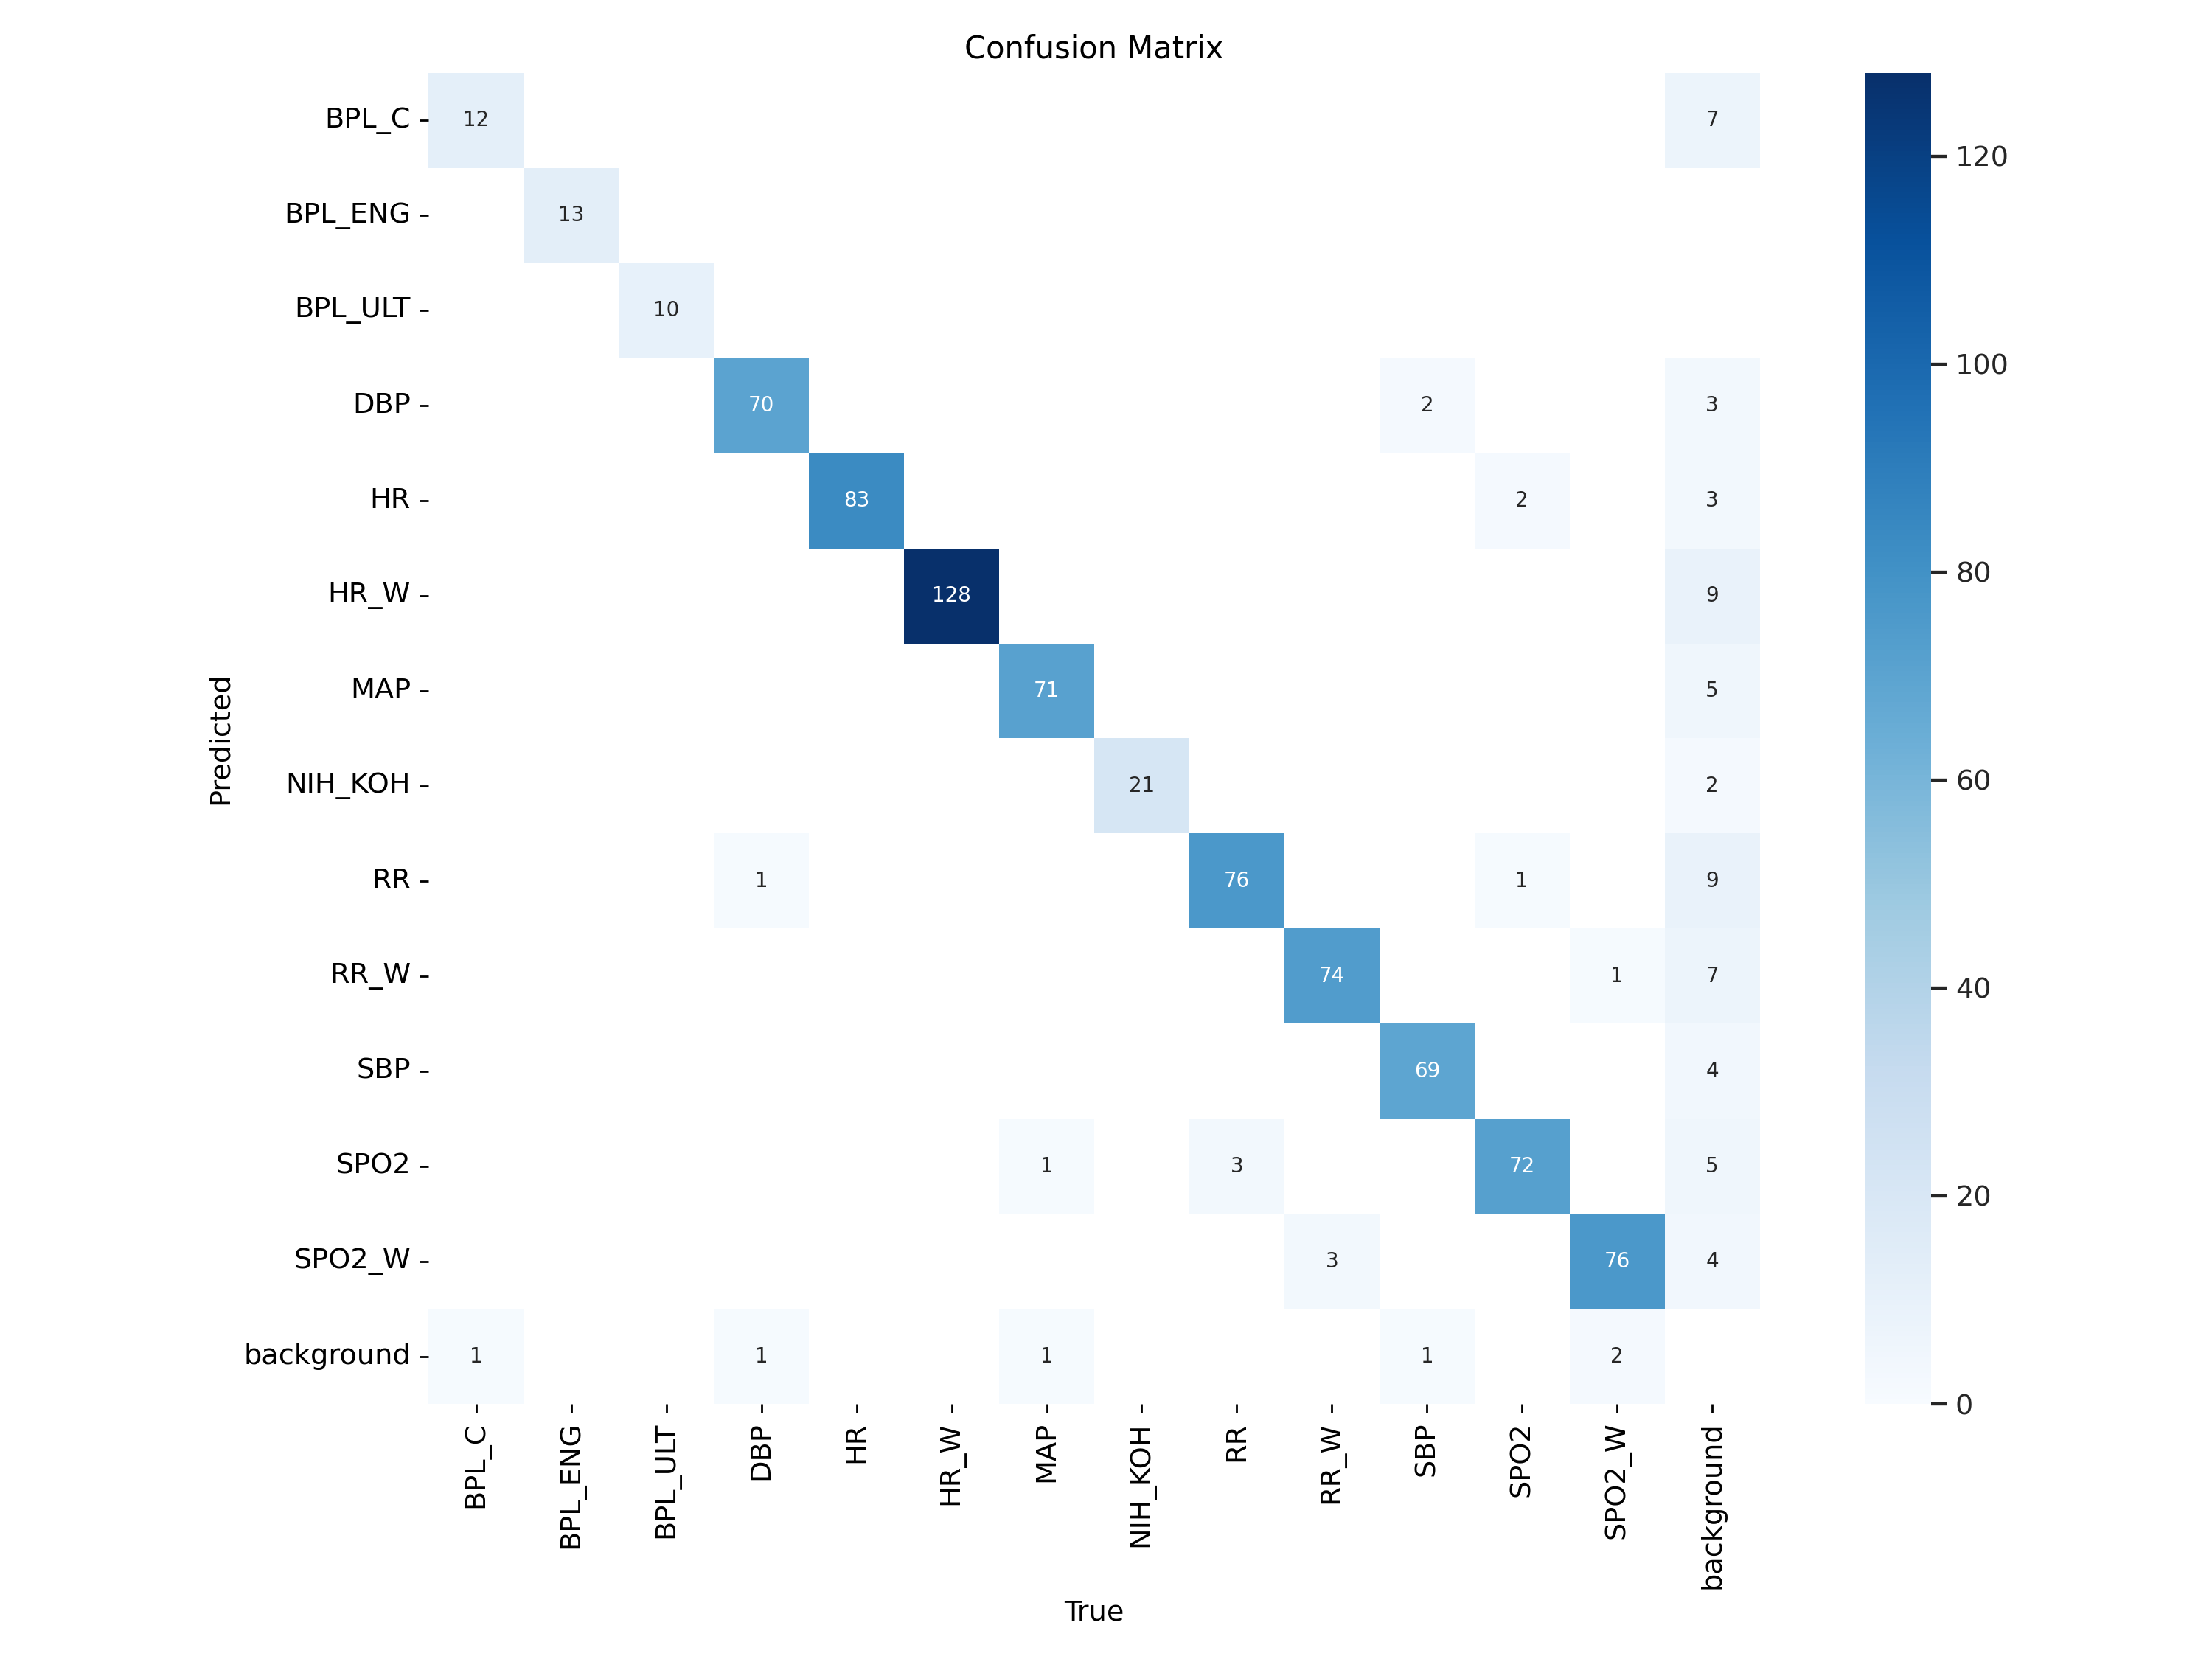

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


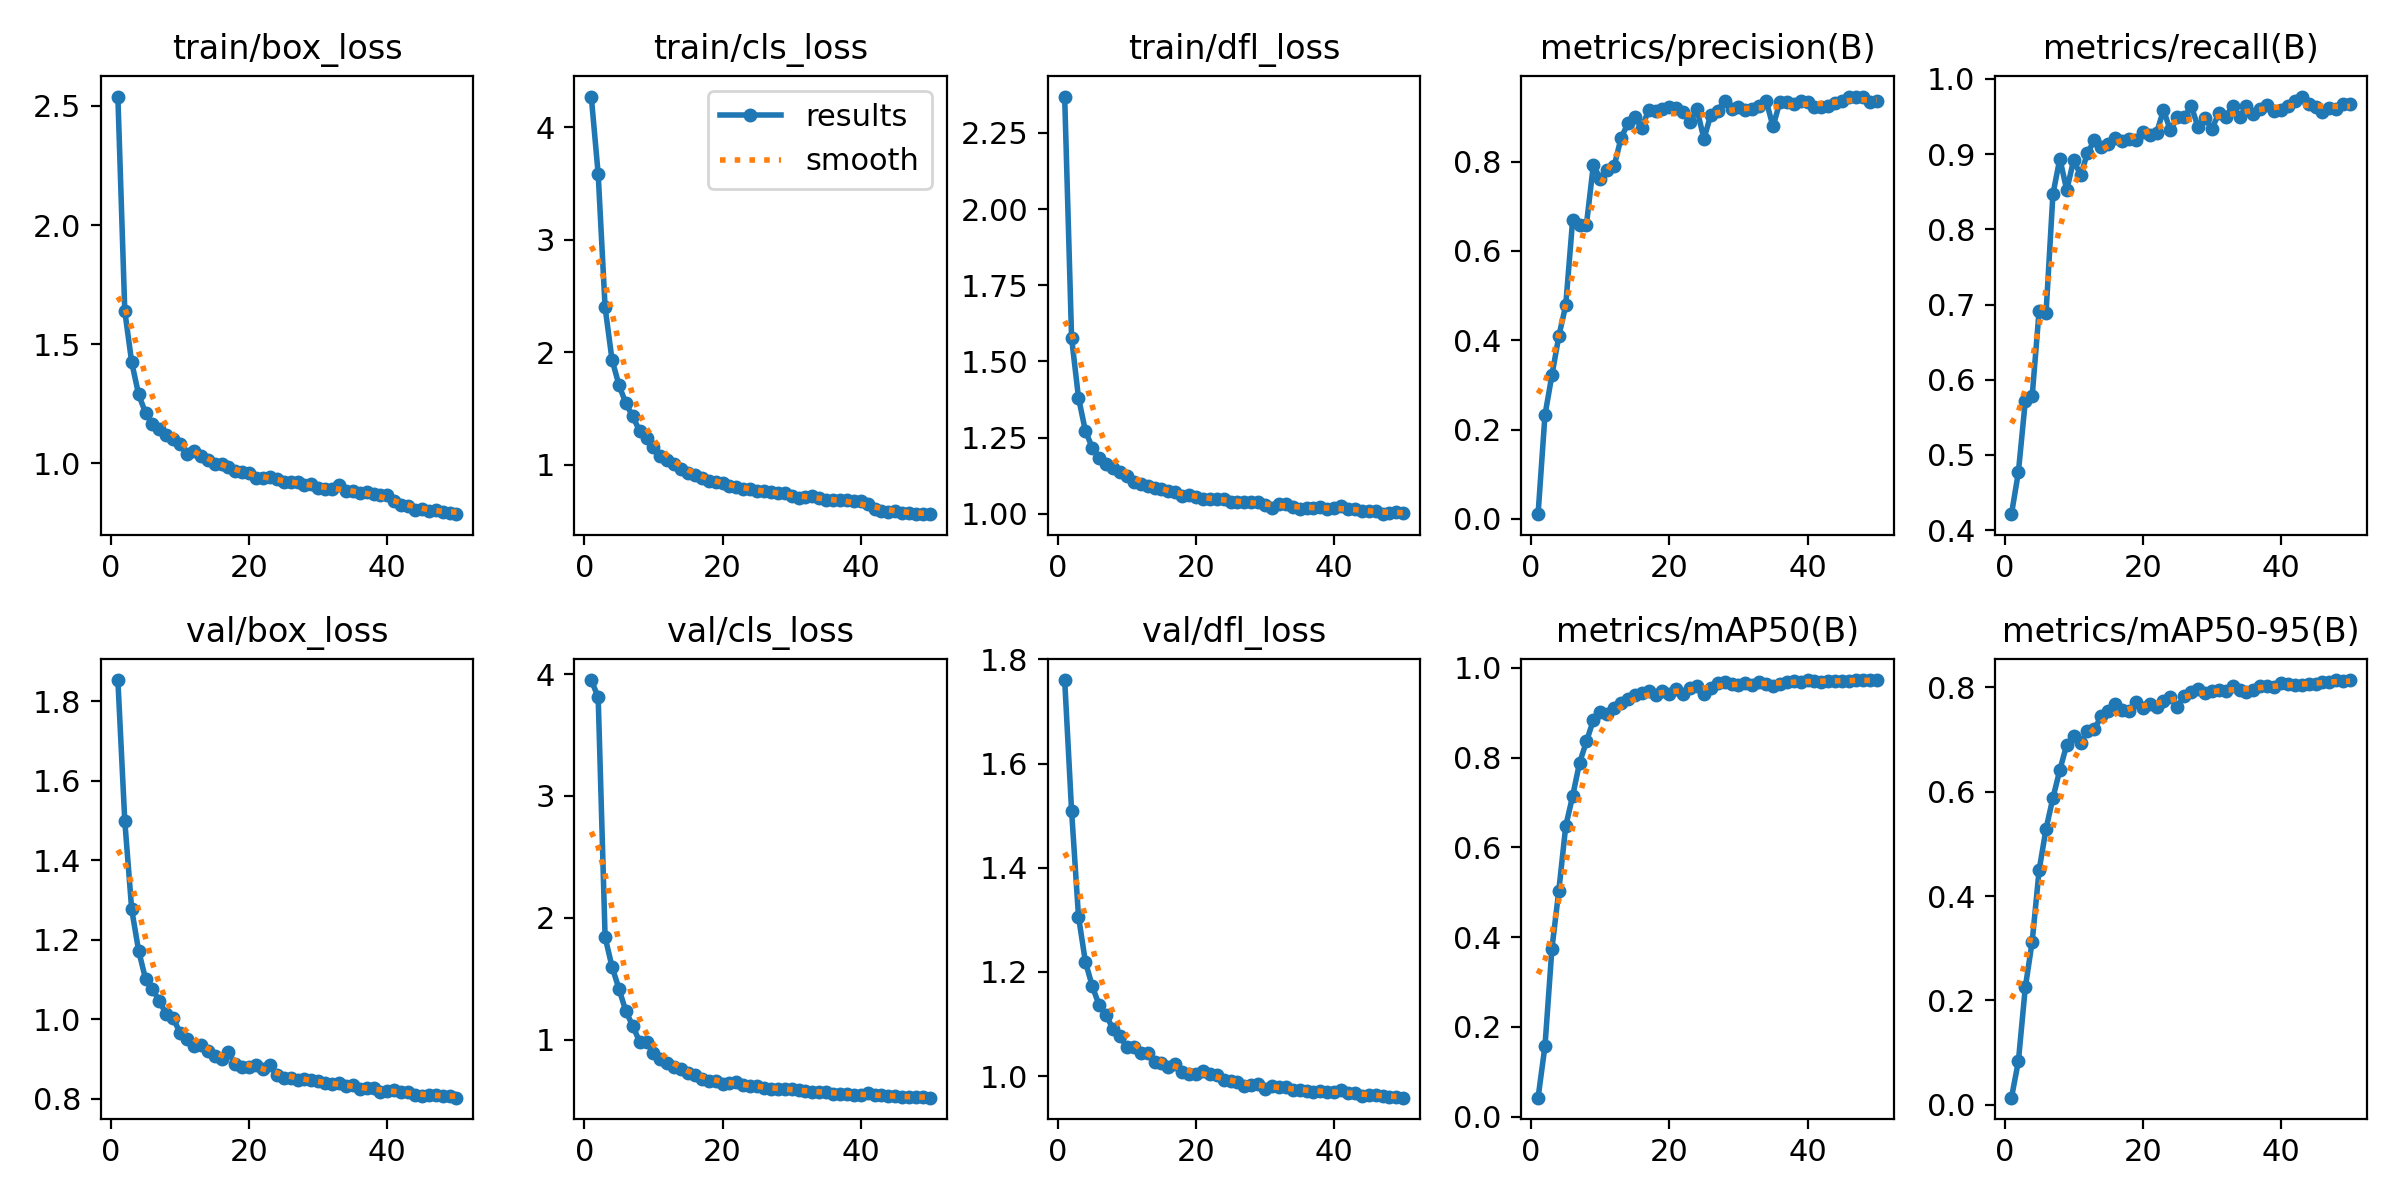

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


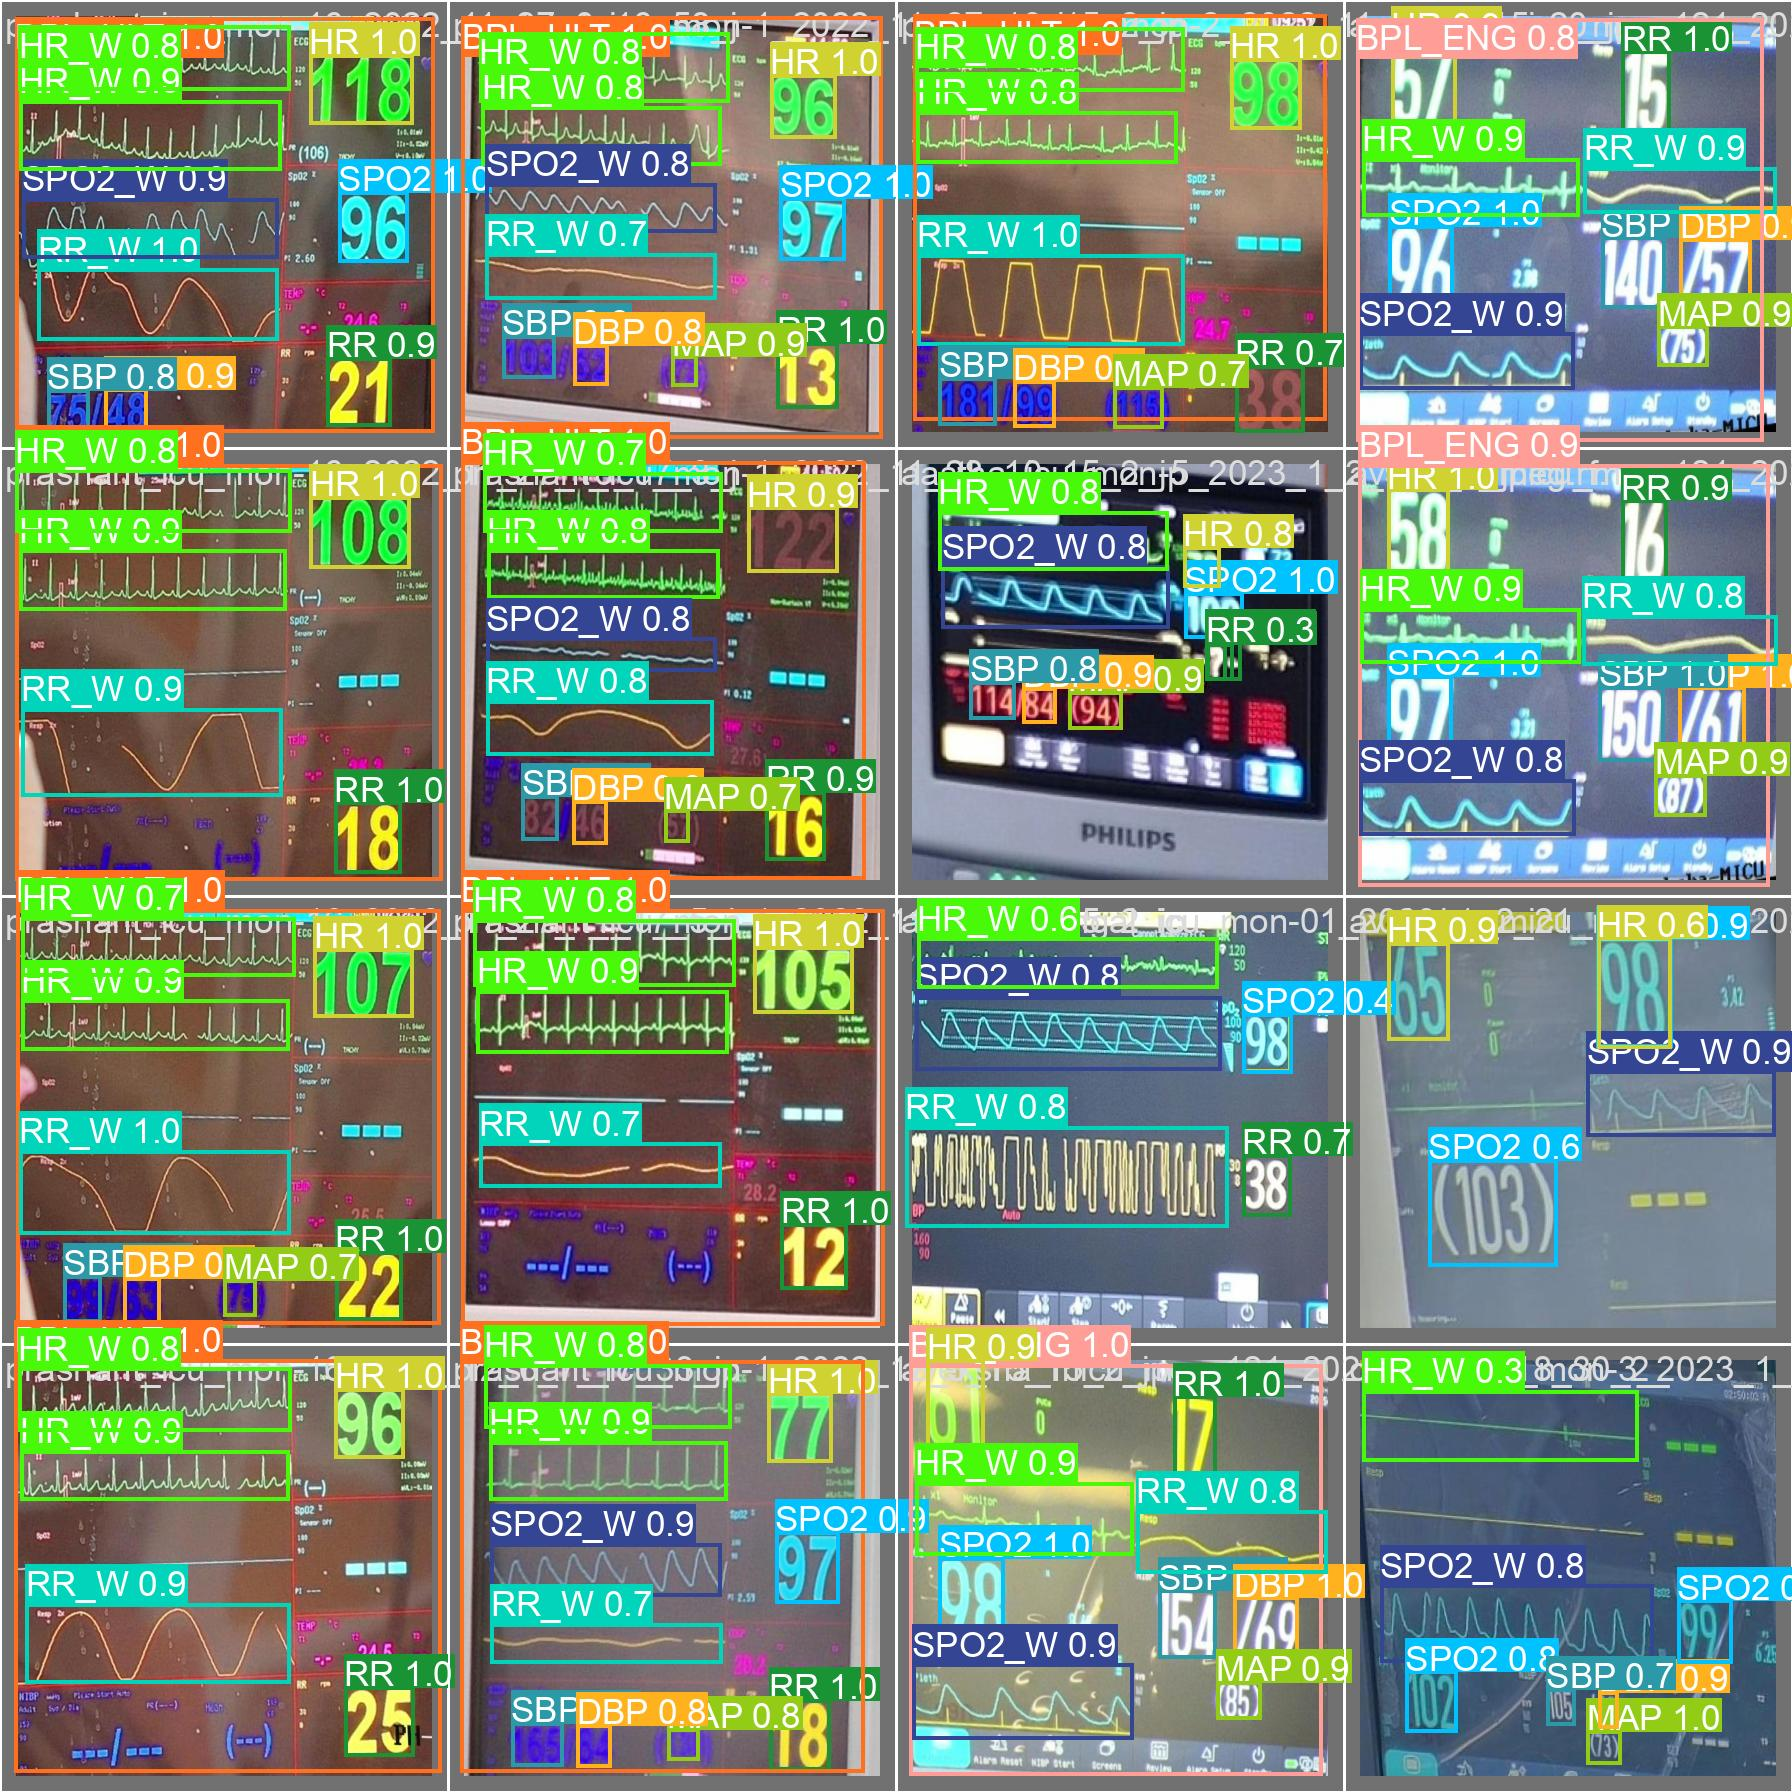

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

VALIDATION

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/vvvv-4/valid/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100% 87/87 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/vvvv-4/valid/images/hcgranchi_sicu_mon-326_2022_11_15_15_0_25_jpeg_jpg.rf.2ec4391f538ad523aa1aae6640c5d357.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/datasets/vvvv-4/valid/images/hcgranchi_sicu_mon-326_2022_11_15_16_30_24_jpeg_jpg.rf.836876036d31cdd4e75de4cb2e500a53.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/datasets/vvvv-4/valid/images/hcgranchi_sicu_mon-326_2022_11_15_19_0_39_jpeg_jpg.rf.c27c3f1237682f2bb44f80db58308d42.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/datasets/vvvv-4/valid/images/hcgranchi_sicu_mon-326_2022_11_16_10_32_29_jpeg_jpg.rf.3e9ca01d802d7205c12a7f24f6e0880b.jpg: 8 duplicate labels removed
val:

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs

image 1/52 /content/datasets/vvvv-4/test/images/aastha_icu_mon-5_2023_1_2_10_0_1_jpeg.rf.574ad16f23676757d4c6fd619294f97b.jpg: 416x416 2 DBPs, 3 HRs, 1 HR_W, 1 MAP, 1 RR_W, 1 SBP, 1 SPO2, 2 SPO2_Ws, 10.4ms
image 2/52 /content/datasets/vvvv-4/test/images/aveksha_micu_mon-121_2021_11_23_15_0_3_jpeg_jpg.rf.d5fe9f77f4b57631b262b7057aa113c2.jpg: 416x416 1 BPL_ENG, 1 DBP, 1 HR, 1 HR_W, 1 MAP, 1 RR, 1 RR_W, 2 SBPs, 1 SPO2, 1 SPO2_W, 6.9ms
image 3/52 /content/datasets/vvvv-4/test/images/aveksha_micu_mon-127_2021_11_24_17_30_33_jpeg_jpg.rf.c601cc827c6af4012792103cfefc3af5.jpg: 416x416 1 BPL_ENG, 1 DBP, 1 HR, 1 HR_W, 1 MAP, 1 RR, 1 RR_W, 1 SBP, 1 SPO2, 1 SPO2_W, 6.2ms
image 4/52 /content/datasets/vvvv-4/test/images/aveksha_micu_mon-127_2021_11_24_23_30_27_jpeg_jpg.rf.08309f20bbedb8f7f7a00e4fd13db25f.jpg: 416x416 1 BPL_ENG

RESULT

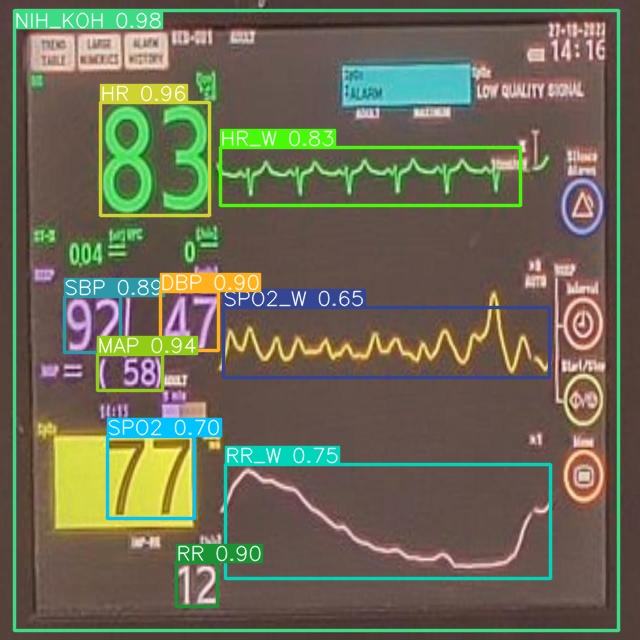

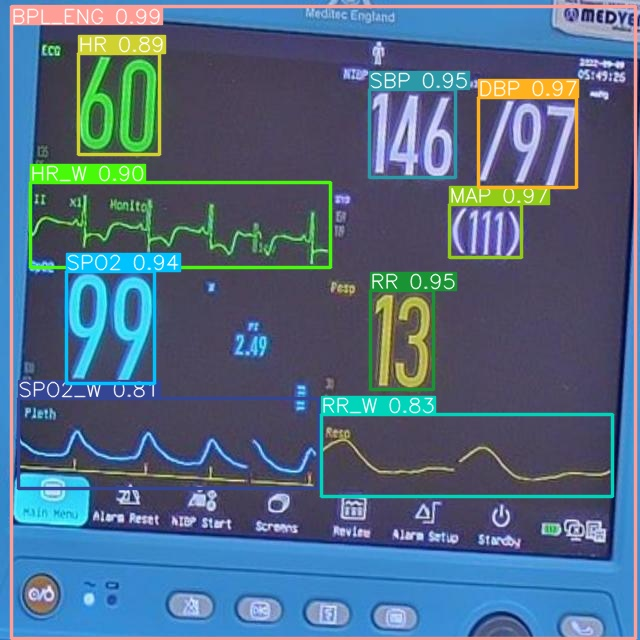

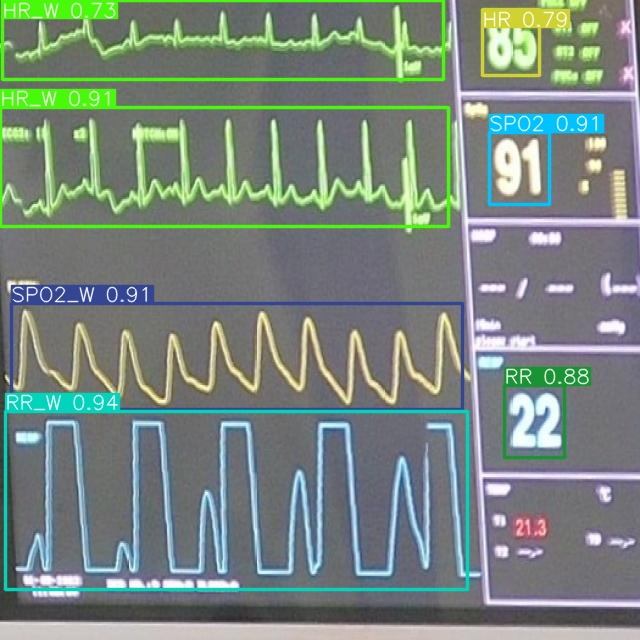

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

TESTING

In [ ]:
#!pip install ultralytics
#from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
!yolo task=detect mode=predict model ="/content/runs/detect/train/weights/best.pt" conf =0.5 source ="/content/gettyimages-939280816.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/gettyimages-939280816.jpg: 256x416 1 HR, 1 HR_W, 3 RRs, 1 RR_W, 1 SPO2, 1 SPO2_W, 86.1ms
Speed: 1.7ms preprocess, 86.1ms inference, 609.7ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
